# **Stock Market Prediction And Forecasting Using Stacked LSTM**
Datasetlinks:  https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Referance: https://youtu.be/Vfx1L2jh2Ng

CHAUDHARI NAYANA RAJU

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
print(df)

            Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.00  ...  121.55                6586

In [5]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034],
           dtype='int64', length=2035)

In [8]:
df.shape

(2035, 8)

In [9]:
df.size

16280

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [11]:
df.info

<bound method DataFrame.info of             Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.00 

In [12]:
df.describe

<bound method NDFrame.describe of             Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0     2018-09-28  234.05  235.95  ...  233.75               3069914          7162.35
1     2018-09-27  234.55  236.80  ...  233.25               5082859         11859.95
2     2018-09-26  240.00  240.00  ...  234.25               2240909          5248.60
3     2018-09-25  233.30  236.75  ...  236.10               2349368          5503.90
4     2018-09-24  233.55  239.20  ...  233.30               3423509          7999.55
...          ...     ...     ...  ...     ...                   ...              ...
2030  2010-07-27  117.60  119.50  ...  118.65                586100           694.98
2031  2010-07-26  120.10  121.00  ...  117.60                658440           780.01
2032  2010-07-23  121.80  121.95  ...  120.65                281312           340.31
2033  2010-07-22  120.30  122.00  ...  120.90                293312           355.17
2034  2010-07-21  122.10  123.0

In [13]:
df_close = df['Close']
df_close.shape

(2035,)

In [14]:
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

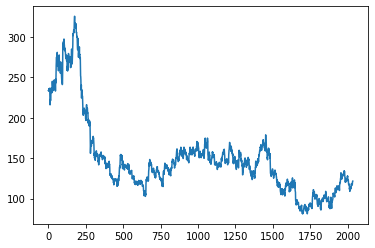

In [16]:
plt.plot(df_close)

In [17]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 19s 445ms/step - loss: 0.0234 - val_loss: 0.0083
Epoch 2/100
23/23 [==============================] - 9s 408ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 3/100
23/23 [==============================] - 9s 407ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 4/100
23/23 [==============================] - 9s 409ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 5/100
23/23 [==============================] - 9s 408ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 6/100
23/23 [==============================] - 9s 403ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 9s 406ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 9s 406ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/100
23/23 [==============================] - 9s 403ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 9s 404ms/step - loss: 0.0010 - val_l

In [19]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

163.7694368492341

In [20]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

105.28760871430242

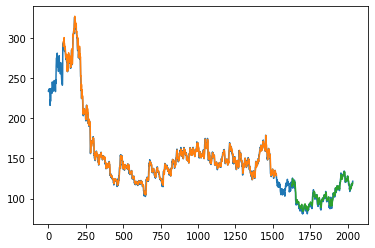

In [21]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [27]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps=300
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>300):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16524976]
301
1 day input [0.03125    0.02348856 0.0249183  0.02144608 0.04840686 0.04575163
 0.03962418 0.03921569 0.04758987 0.04513889 0.04166667 0.04125817
 0.05044935 0.05555556 0.05494281 0.05412582 0.0435049  0.04799837
 0.05147059 0.05065359 0.03431373 0.04575163 0.04187092 0.04554739
 0.03941993 0.02716503 0.03125    0.05882353 0.07148693 0.08721405
 0.08986928 0.10498366 0.08905229 0.10355392 0.10375817 0.12275327
 0.10906863 0.09660948 0.1064134  0.10457516 0.11049837 0.1127451
 0.09803922 0.09987745 0.08925654 0.0747549  0.08169935 0.08925654
 0.09068627 0.08129085 0.08823529 0.08455882 0.07945261 0.08374183
 0.07781863 0.09824346 0.09089052 0.09007353 0.09558824 0.06862745
 0.06372549 0.0494281  0.04799837 0.04534314 0.0443219  0.03941993
 0.0379902  0.04656863 0.05085784 0.07209967 0.06535948 0.07230392
 0.07802288 0.07741013 0.06086601 0.06413399 0.07046569 0.05412582
 0.0498366  0.05167484 0.05330882 0.0435049  0.02634804 0.02410131
 0.02961601 0.01960784 0.02961601 

In [31]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

df3 = df_close.tolist()
df3.extend(lst_output)

len(df_close)

2035

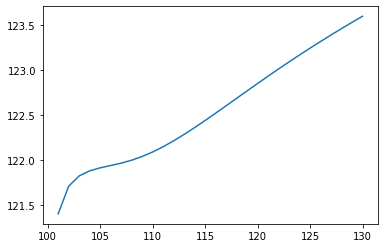

In [32]:
# plt.plot(day_new, scaler.inverse_transform(df_close()))
plt.plot(day_pred, scaler.inverse_transform(lst_output))